<a href="https://colab.research.google.com/github/lucasloch/machine_learning_python/blob/main/aulas/3_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

Uma rede neural desnamente conectada é uma na qual todos o neurônicos da camada atual estão conectados a todos os neurônios da camada anterior.

A função de ativação Tanh (Tangente Hiperbólica) garante valores entre -1 e 1

## Optimizer

Esta função é a responsável por implementar o algoritmo de retropropagação. Alguns mais comuns são:

*   Gradient Descent
*   Stochastic Gradient Descent
*   Mini-Batch Gradient Descent
*   Momentum
*   Nesterov Accelerated Gradient

Link: https://firiuza.medium.com/optimizers-for-training-neural-networks-e0196662e21e



# Creating Neural Network

## Imports

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Dataset

Será usado um dataset da MNIST Fashion Dataset, que contém 60.000 imagens para treinamento e 10.000 para teste/validação.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
# Vamos dividir em trinamento e teste
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

Temos ao todo 60.000 imagens com 28x28 pixels.

In [4]:
train_images[0, 23, 23]

194

Os pixels estão entre 0 e 255, de preto a branco.

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Os rótulos são inteiros de 0-9. Cada inteiro representa um artigo de ruoupa específico. Criaremos uma lista para armazenar os nomes dos rótulos.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Por fim iremos visualizar uma dessas imagens.

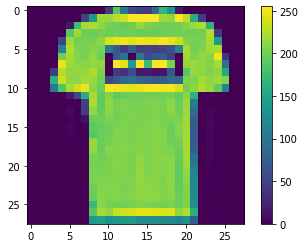

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Processing

Antes de criar o modelo é necessário realizar o pré-processamento dos dados. Neste caso estaremos por comprimir a escala de todos os valores dos pixels para entre 0 e 1.

In [8]:
train_images = train_images / 255

test_images = test_images / 255

## Building the Model

Para este modelo usaremos um modelo keras sequencial com três diferentes camadas. Este modelo representa uma rede neural feed-forward (passa valores da esquerda para direita).

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # (1) Camada de Entrada
    keras.layers.Dense(128, activation='relu'),   # (2) Camada Oculta
    keras.layers.Dense(10, activation='softmax')  # (3) Camada de Saída
])

**Camada 1:** Esta é a camada de entrada, e irá basicamente receber os dados como uma matriz 28x28 e achatar todos pixels em 784 pixels.

**Camada 2:** Esta a camada oculta do modelo, com um total de 128 neurônios e com a função de ativação "relu".

**Camada 3:** Por fim temos aa camada de saída, com 10 neurônios e função de ativação "softmax".

## Compile the Model

O último passo é definir a função de perda, o otimizador e as métricas a ser análisadas.

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [15]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1810 - accuracy: 0.9311


## Evaluating the Model

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Precisão do teste: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8880
Precisão do teste:  0.8880000114440918


## Making Predictions

In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([6.3980079e-15, 7.7733901e-18, 9.0128209e-14, 1.8570322e-11,
       4.6818804e-16, 1.9965906e-05, 9.3534291e-16, 1.7340512e-03,
       3.1538189e-11, 9.9824595e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

Ankle boot


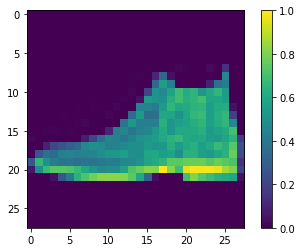

In [23]:
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Verify Predictions

Pick a number: 42


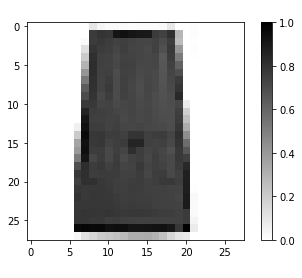

In [25]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)